<h2> Import libraries </h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import norm, skew

In [2]:
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

Read CSV Files

In [3]:
sample = pd.read_csv('sample_submission.csv')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

<h2> Data Preprocessing</h2>

In [4]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
print('Training data shape: ', train.shape)
print('Test data shape: ', test.shape)

Training data shape:  (1460, 81)
Test data shape:  (1459, 80)


In [6]:
all_data = pd.concat([train, test])
all_data.shape

(2919, 81)

In [7]:
all_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [8]:
print('Any duplicated values: ', all_data.duplicated().values.any())

Any duplicated values:  False


In [9]:
print('Any missing values: ', all_data.isna().values.any())

Any missing values:  True


In [10]:
all_data.isna().sum().sort_values(ascending=False).head(40)

PoolQC           2909
MiscFeature      2814
Alley            2721
Fence            2348
MasVnrType       1766
SalePrice        1459
FireplaceQu      1420
LotFrontage       486
GarageYrBlt       159
GarageFinish      159
GarageQual        159
GarageCond        159
GarageType        157
BsmtExposure       82
BsmtCond           82
BsmtQual           81
BsmtFinType2       80
BsmtFinType1       79
MasVnrArea         23
MSZoning            4
Functional          2
BsmtFullBath        2
Utilities           2
BsmtHalfBath        2
Electrical          1
TotalBsmtSF         1
BsmtUnfSF           1
KitchenQual         1
BsmtFinSF2          1
BsmtFinSF1          1
SaleType            1
GarageCars          1
Exterior2nd         1
Exterior1st         1
GarageArea          1
YrSold              0
Fireplaces          0
MoSold              0
MiscVal             0
SaleCondition       0
dtype: int64

<p> There are 35 columns with missing values </p>

In [11]:
all_data.LotFrontage.describe()

count    2433.000000
mean       69.305795
std        23.344905
min        21.000000
25%        59.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [12]:
all_data.LotFrontage.fillna(0, inplace=True)

In [13]:
all_data.FireplaceQu.value_counts()

FireplaceQu
Gd    744
TA    592
Fa     74
Po     46
Ex     43
Name: count, dtype: int64

In [14]:
all_data.FireplaceQu.fillna('NA', inplace=True)

In [15]:
# Check for MasVnrType
all_data.MasVnrType.value_counts()

MasVnrType
BrkFace    879
Stone      249
BrkCmn      25
Name: count, dtype: int64

In [16]:
# Replace missing values with None
all_data.MasVnrType.fillna('None', inplace=True)

In [17]:
all_data.MasVnrType.value_counts()

MasVnrType
None       1766
BrkFace     879
Stone       249
BrkCmn       25
Name: count, dtype: int64

Fill categorical missing values with NA

In [18]:
all_data.PoolQC.fillna('NA', inplace=True)
all_data.MiscFeature.fillna('NA', inplace=True)
all_data.Alley.fillna('NA', inplace=True)
all_data.Fence.fillna('NA', inplace=True)
all_data.GarageFinish.fillna('NA', inplace=True)
all_data.GarageType.fillna('NA', inplace=True)
all_data.GarageQual.fillna('NA', inplace=True)
all_data.GarageCond.fillna('NA', inplace=True)
all_data.BsmtFinType1.fillna('NA', inplace=True)
all_data.BsmtFinType2.fillna('NA', inplace=True)
all_data.BsmtExposure.fillna('NA', inplace=True)
all_data.BsmtQual.fillna('NA', inplace=True)
all_data.BsmtCond.fillna('NA', inplace=True)

Fill Numerical missing values with 0

In [19]:
all_data.GarageCars.fillna(0, inplace=True)
all_data.GarageArea.fillna(0, inplace=True)
all_data.BsmtFinSF1.fillna(0, inplace=True)
all_data.TotalBsmtSF.fillna(0, inplace=True)
all_data.GarageYrBlt.fillna(value=0, inplace=True)
all_data.MasVnrArea.fillna(0, inplace=True)
all_data.BsmtUnfSF.fillna(0, inplace=True)
all_data.BsmtFinSF2.fillna(0, inplace=True)
all_data.BsmtFullBath.fillna(0, inplace=True)
all_data.BsmtHalfBath.fillna(0, inplace=True)


Fill categorical missing values with most common terms

In [20]:
all_data.MSZoning.fillna('RL', inplace=True)
all_data.KitchenQual.fillna('TA', inplace=True)
all_data.Electrical.fillna('SBrkr', inplace=True)
all_data.Utilities.fillna('AllPub', inplace=True)
all_data.Functional.fillna('Typ', inplace=True)
all_data.Exterior2nd.fillna('VinylSd', inplace=True)
all_data.Exterior1st.fillna('VinylSd', inplace=True)
all_data.SaleType.fillna('WD', inplace=True)

In [21]:
all_data.isna().sum().sort_values(ascending=False).head(10)

SalePrice       1459
CentralAir         0
GarageYrBlt        0
GarageType         0
FireplaceQu        0
Fireplaces         0
Functional         0
TotRmsAbvGrd       0
KitchenQual        0
KitchenAbvGr       0
dtype: int64

Check for columns of string type values

In [22]:
string_cols = all_data.select_dtypes(include=['object']).columns

In [23]:
string_cols

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [24]:
all_data[string_cols].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NA,NA,NA,WD,Normal
1,RL,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NA,NA,NA,WD,Normal
2,RL,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NA,NA,NA,WD,Normal
3,RL,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NA,NA,NA,WD,Abnorml
4,RL,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NA,NA,NA,WD,Normal


Convert categorical features to numerical features

In [25]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
all_data[string_cols] = ordinal_encoder.fit_transform(all_data[string_cols])
ordinal_encoder.categories_[:5]

[array(['C (all)', 'FV', 'RH', 'RL', 'RM'], dtype=object),
 array(['Grvl', 'Pave'], dtype=object),
 array(['Grvl', 'NA', 'Pave'], dtype=object),
 array(['IR1', 'IR2', 'IR3', 'Reg'], dtype=object),
 array(['Bnk', 'HLS', 'Low', 'Lvl'], dtype=object)]

In [26]:
train = all_data.iloc[:1460]
test = all_data.iloc[1460:].drop('SalePrice', axis=1)

In [27]:
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


In [28]:
train.drop('Id', axis=1, inplace=True)

Check for correlations of SalePrice

In [29]:
price_correlation = train.corr()['SalePrice']
print('Highest positives correlation')
print(price_correlation.sort_values(ascending=False).head(10))
print('\n')
print('Least negatives correlation')
print(price_correlation.sort_values(ascending=False).tail(10))

Highest positives correlation
SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64


Least negatives correlation
KitchenAbvGr   -0.135907
MSZoning       -0.166872
LotShape       -0.255580
BsmtExposure   -0.294589
HeatingQC      -0.400178
GarageType     -0.415283
GarageFinish   -0.425684
KitchenQual    -0.589189
BsmtQual       -0.593734
ExterQual      -0.636884
Name: SalePrice, dtype: float64


Pick the most correlated features and visualize the relation

In [30]:
sns.set_style('darkgrid')

Text(0.5, 0, 'House Prices')

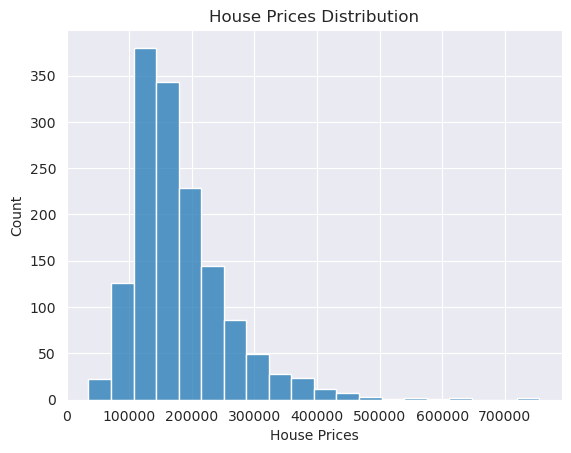

In [31]:
sns.histplot(data=train, x='SalePrice', bins=20)
plt.title('House Prices Distribution')
plt.xlabel('House Prices')

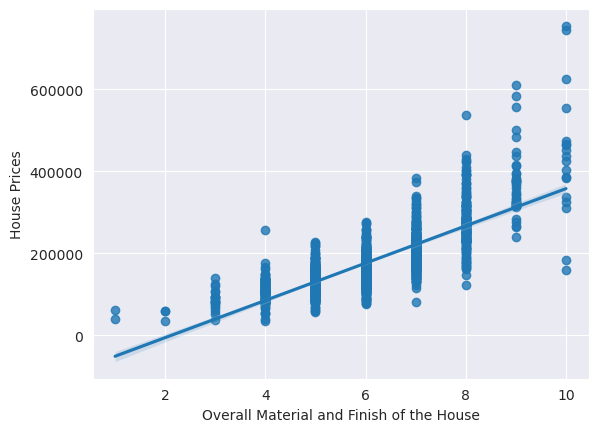

In [32]:
sns.regplot(data=train, x='OverallQual', y='SalePrice')
plt.xlabel('Overall Material and Finish of the House')
plt.ylabel('House Prices')
plt.show()

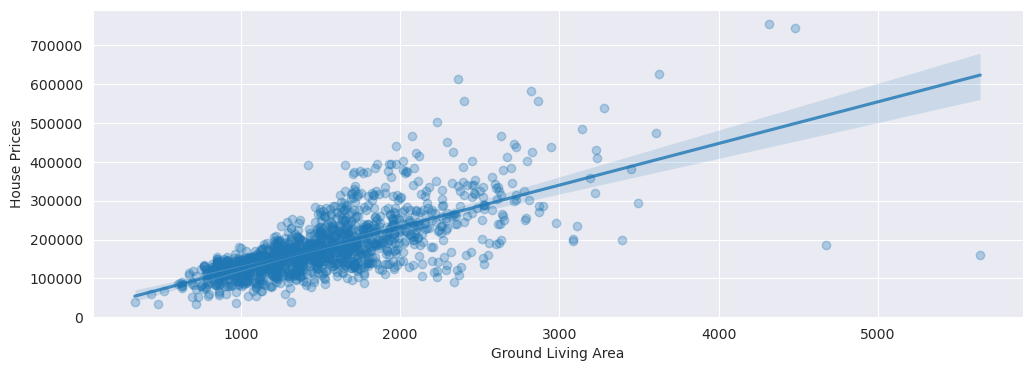

In [33]:
plt.figure(figsize=(12, 4))
sns.regplot(data=train, x='GrLivArea', y='SalePrice', line_kws={'alpha': 0.8}, scatter_kws={'alpha': 0.3})
plt.xlabel('Ground Living Area')
plt.ylabel('House Prices')
plt.show()

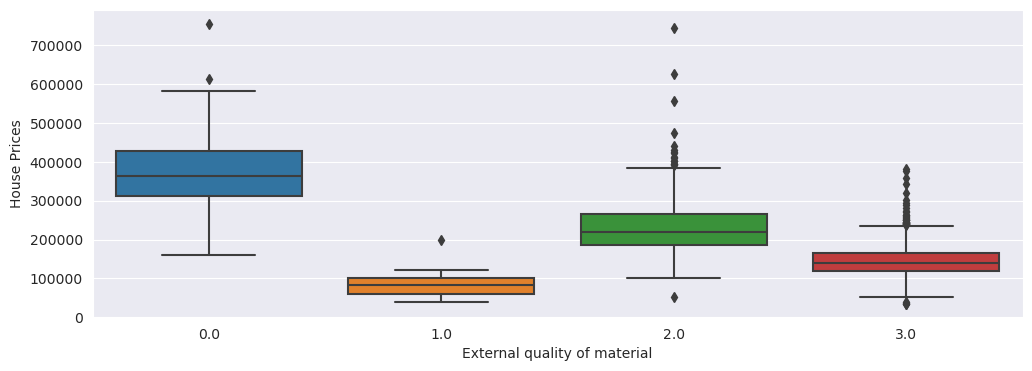

In [34]:
plt.figure(figsize=(12, 4))
sns.boxplot(data=train, x='ExterQual', y='SalePrice')
plt.xlabel('External quality of material')
plt.ylabel('House Prices')
plt.show()

<h2>Machine Learning</h2>

In [35]:
# import models that we will need
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import xgboost as xgb
import tensorflow as tf
import tensorflow_decision_forests as tfdf
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

import logging
logging.getLogger('tensorflow').disabled = True

from math import sqrt

Initialize the XGBoost Regression Function

In [36]:
def implement_xgboost(train_dmatrix, params, evals, num_boost, stop_round, verbose_eval):
    evals_result = {}
    model = xgb.train(params=params, evals=evals, dtrain=train_dmatrix, num_boost_round=num_boost,
                      verbose_eval=verbose_eval, early_stopping_rounds=stop_round, evals_result=evals_result)
    plt.plot(evals_result['Training']['rmse'], label='Training RMSE')
    plt.plot(evals_result['Validation']['rmse'], label='Validation RMSE')
    plt.ylabel('RMSE')
    plt.xlabel('Number of rounds')
    plt.legend()
    
    return model

Initialize Scikit-Learn Random Forest Regressor

In [37]:
def implement_sklearn_rf(X_train, y_train, X_test, y_test, n_estimators, max_depth):
    model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth)
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    
    print('Training Root Mean Squared Error: ', sqrt(mean_squared_error(y_true=y_train, y_pred=y_pred_train)))
    print('Test Root Mean Squared Error: ', sqrt(mean_squared_error(y_true=y_test, y_pred=y_pred_test)))
    print('\n')
    print('Training Mean Absolute Error: ', mean_absolute_error(y_true=y_train, y_pred=y_pred_train))
    print('Test Mean Absolute Error: ', mean_absolute_error(y_true=y_test, y_pred=y_pred_test))
    print('\n')
    print('Training R2 Score: ', r2_score(y_true=y_train, y_pred=y_pred_train))
    print('Test R2 Score: ', r2_score(y_true=y_test, y_pred=y_pred_test))

Implement Tensorflow Random Forest Regressor with automatic hyperparameter tuning

In [38]:
def implement_tensorflow_rf(train_ds_pd, test_ds_pd):
    task = tfdf.keras.Task.REGRESSION
    train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label='SalePrice', task=task)
    test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_ds_pd, label='SalePrice', task=task)
    
    model = tfdf.keras.RandomForestModel(task=task, hyperparameter_template="benchmark_rank1")
    model.fit(train_ds)
    model.compile(loss=tf.keras.metrics.RootMeanSquaredError(), metrics=['mae'])
    
    logs = model.make_inspector().training_logs()
    print('Training Loss: ', logs[-1].evaluation.rmse)
    plt.plot([log.num_trees for log in logs], [log.evaluation.rmse for log in logs])
    plt.title('Training loss')
    plt.xlabel('Number of Trees')
    
    model.evaluate(test_ds, return_dict=True)

Implement TensorFlow Gradient Boosted Trees Model

In [39]:
def implement_tensorflow_gbt(train_ds_pd, test_ds_pd):
    task = tfdf.keras.Task.REGRESSION
    train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label='SalePrice', task=task)
    test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_ds_pd, label='SalePrice', task=task)
    
    model = tfdf.keras.GradientBoostedTreesModel(task=task, hyperparameter_template='benchmark_rank1')
    model.fit(train_ds)
    model.compile(loss=tf.keras.metrics.RootMeanSquaredError(), metrics=['mae'])
    
    logs = model.make_inspector().training_logs()
    print('Training Loss: ', logs[-1].evaluation.rmse)
    plt.plot([log.num_trees for log in logs], [log.evaluation.rmse for log in logs])
    plt.title('Training loss')
    plt.xlabel('Number of trees')
    
    model.evaluate(test_ds, return_dict=True)

<h3> Round 1 </h3>

Start with the OverallQual feature

In [40]:
X = train[['OverallQual']]
y = train['SalePrice']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [42]:
print(X_train.count())
print(X_test.count())
print('Y train count: ', y_train.count())
print('Y test count: ', y_test.count())

OverallQual    1168
dtype: int64
OverallQual    292
dtype: int64
Y train count:  1168
Y test count:  292


Sklearn

In [43]:
implement_sklearn_rf(X_train, y_train, X_test, y_test, n_estimators=100, max_depth=None)

Training Root Mean Squared Error:  44718.953420001635
Test Root Mean Squared Error:  44833.43065295697


Training Mean Absolute Error:  30810.129115990938
Test Mean Absolute Error:  30708.614459160857


Training R2 Score:  0.6872534550035438
Test R2 Score:  0.6623534355179213


XGBoost

In [44]:
dtrain_reg = xgb.DMatrix(X_train, y_train)
dtest_reg = xgb.DMatrix(X_test, y_test)

[0]	Training-rmse:64828.59926	Training-mae:45935.13245	Validation-rmse:61962.76130	Validation-mae:45606.65074
[9]	Training-rmse:44770.17394	Training-mae:30807.61719	Validation-rmse:44530.27270	Validation-mae:30619.63838


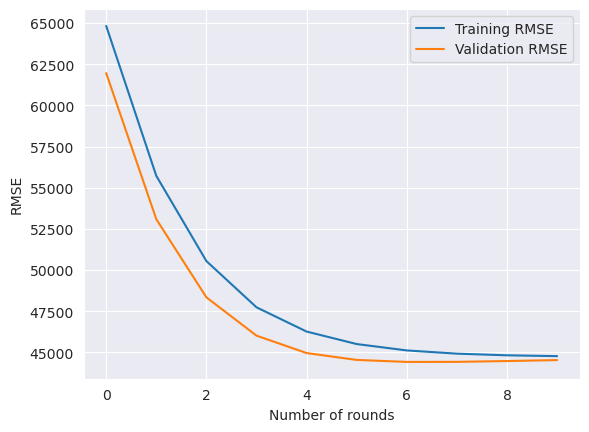

In [45]:
params = {'objective': 'reg:squarederror', 'tree_method': 'hist', 'eval_metric': ['rmse', 'mae']}
evals = [(dtrain_reg, 'Training'), (dtest_reg, 'Validation')]
n = 300
stop_round = 1
verbose_eval = 10

implement_xgboost(dtrain_reg, params, evals, n, stop_round, verbose_eval)

Tensorflow

In [46]:
train_ds = X_train.join(y_train)
test_ds = X_test.join(y_test)

Resolve hyper-parameter template "benchmark_rank1" to "benchmark_rank1@v1" -> {'growing_strategy': 'BEST_FIRST_GLOBAL', 'categorical_algorithm': 'RANDOM', 'split_axis': 'SPARSE_OBLIQUE', 'sparse_oblique_normalization': 'MIN_MAX', 'sparse_oblique_num_projections_exponent': 1.0}.
Use /tmp/tmp6jfgx6il as temporary training directory
Reading training dataset...


[WARNING 24-06-28 19:55:30.0843 EAT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-06-28 19:55:30.0853 EAT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-06-28 19:55:30.0854 EAT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:07.345363. Found 1168 examples.
Training model...
Model trained in 0:00:00.275305
Compiling model...


[INFO 24-06-28 19:55:37.7354 EAT kernel.cc:1233] Loading model from path /tmp/tmp6jfgx6il/model/ with prefix f8b5759e21644f14
[INFO 24-06-28 19:55:37.7455 EAT decision_forest.cc:734] Model loaded with 134 root(s), 2010 node(s), and 1 input feature(s).
[INFO 24-06-28 19:55:37.7455 EAT abstract_model.cc:1362] Engine "GradientBoostedTreesGeneric" built
[INFO 24-06-28 19:55:37.7456 EAT kernel.cc:1061] Use fast generic engine


Model compiled.
Training Loss:  55655.7890625
1/1 [==============================] - 13s 13s/step - loss: 44403.8516 - mae: 30717.1719


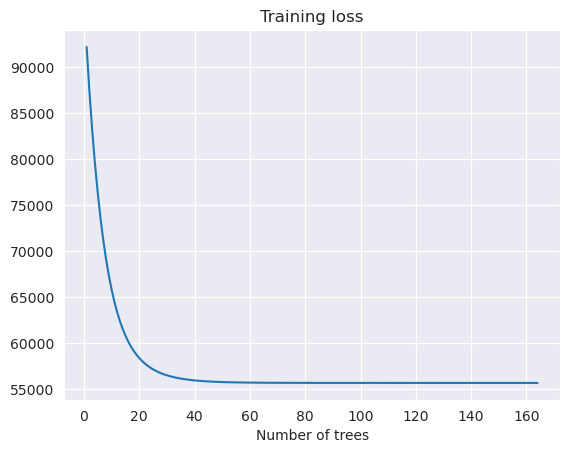

In [47]:
implement_tensorflow_gbt(train_ds, test_ds)

Resolve hyper-parameter template "benchmark_rank1" to "benchmark_rank1@v1" -> {'winner_take_all': True, 'categorical_algorithm': 'RANDOM', 'split_axis': 'SPARSE_OBLIQUE', 'sparse_oblique_normalization': 'MIN_MAX', 'sparse_oblique_num_projections_exponent': 1.0}.


Use /tmp/tmphjycwilg as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.255200. Found 1168 examples.
Training model...
Model trained in 0:00:00.132323
Compiling model...


[INFO 24-06-28 19:56:01.3091 EAT kernel.cc:1233] Loading model from path /tmp/tmphjycwilg/model/ with prefix c6d2320dc6964c07
[INFO 24-06-28 19:56:01.3273 EAT decision_forest.cc:734] Model loaded with 300 root(s), 4612 node(s), and 1 input feature(s).
[INFO 24-06-28 19:56:01.3274 EAT abstract_model.cc:1362] Engine "RandomForestGeneric" built
[INFO 24-06-28 19:56:01.3274 EAT kernel.cc:1061] Use fast generic engine


Model compiled.
Training Loss:  45495.736778279854
1/1 [==============================] - 1s 882ms/step - loss: 44800.3828 - mae: 30835.4141


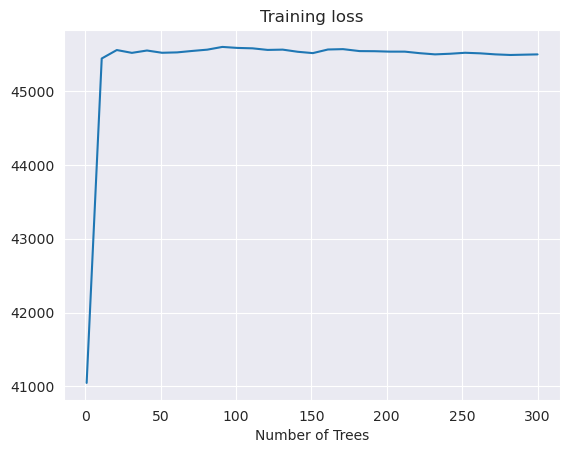

In [48]:
implement_tensorflow_rf(train_ds, test_ds)

Let 44000 be the baseline RMSE for the validation set and 44000 for the training set

<h3>Round 2</h3>

Add another feature. Use the second highest correlated feature to the Sale Price.

In [49]:
X = train[['OverallQual', 'GrLivArea']]

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

XGBoost

In [51]:
dtrain_reg = xgb.DMatrix(X_train, y_train)
dtest_reg = xgb.DMatrix(X_test, y_test)

[0]	Training-rmse:61730.22340	Training-mae:43694.30061	Validation-rmse:59680.32878	Validation-mae:44015.69376
[1]	Training-rmse:49644.65308	Training-mae:34655.07202	Validation-rmse:48744.87836	Validation-mae:35134.74946
[2]	Training-rmse:41673.21185	Training-mae:28867.84341	Validation-rmse:42684.21523	Validation-mae:29878.16529
[3]	Training-rmse:36597.66127	Training-mae:25408.11247	Validation-rmse:39339.84068	Validation-mae:27377.47434
[4]	Training-rmse:33193.69321	Training-mae:23346.29083	Validation-rmse:37974.81460	Validation-mae:26524.28473


[5]	Training-rmse:31014.52862	Training-mae:22101.20690	Validation-rmse:37693.70976	Validation-mae:26534.83222
[6]	Training-rmse:29522.22268	Training-mae:21247.23286	Validation-rmse:37835.15918	Validation-mae:26612.75816


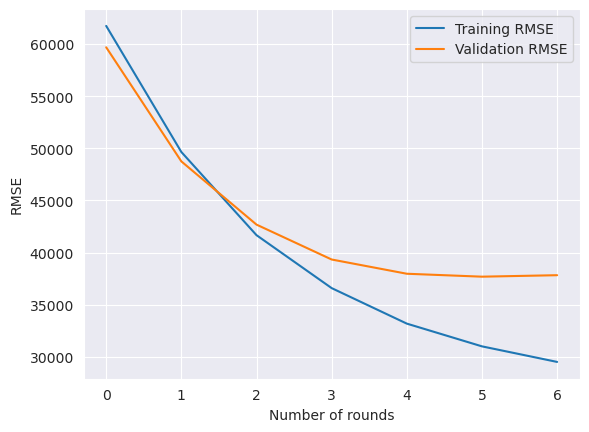

In [52]:
params = {'objective': 'reg:squarederror', 'tree_method': 'hist', 'eval_metric': ['rmse', 'mae']}
evals = [(dtrain_reg, 'Training'), (dtest_reg, 'Validation')]
n = 10
stop_round = 2
verbose_eval = 1

implement_xgboost(dtrain_reg, params, evals, n, stop_round, verbose_eval)

Better score. Surpasses the baseline in both training error and test error

Sklearn

In [53]:
implement_sklearn_rf(X_train, y_train, X_test, y_test, n_estimators=10, max_depth=5)

Training Root Mean Squared Error:  31760.733817506363
Test Root Mean Squared Error:  38321.719112132974


Training Mean Absolute Error:  23391.777288081816
Test Mean Absolute Error:  26683.658609014154


Training R2 Score:  0.8422423912432948
Test R2 Score:  0.7533118107972943


Tensorflow

In [54]:
train_ds = X_train.join(y_train)
test_ds = X_test.join(y_test)

Resolve hyper-parameter template "benchmark_rank1" to "benchmark_rank1@v1" -> {'winner_take_all': True, 'categorical_algorithm': 'RANDOM', 'split_axis': 'SPARSE_OBLIQUE', 'sparse_oblique_normalization': 'MIN_MAX', 'sparse_oblique_num_projections_exponent': 1.0}.
Use /tmp/tmp4g3a74l8 as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.512708. Found 1168 examples.
Training model...


[INFO 24-06-28 19:56:05.5935 EAT kernel.cc:1233] Loading model from path /tmp/tmp4g3a74l8/model/ with prefix ba8f3bf08f9e4115


Model trained in 0:00:01.249086
Compiling model...


[INFO 24-06-28 19:56:06.0288 EAT decision_forest.cc:734] Model loaded with 300 root(s), 101700 node(s), and 2 input feature(s).
[INFO 24-06-28 19:56:06.0289 EAT kernel.cc:1061] Use fast generic engine


Model compiled.
Training Loss:  39285.677337106245
1/1 [==============================] - 1s 773ms/step - loss: 42306.9922 - mae: 28405.6582


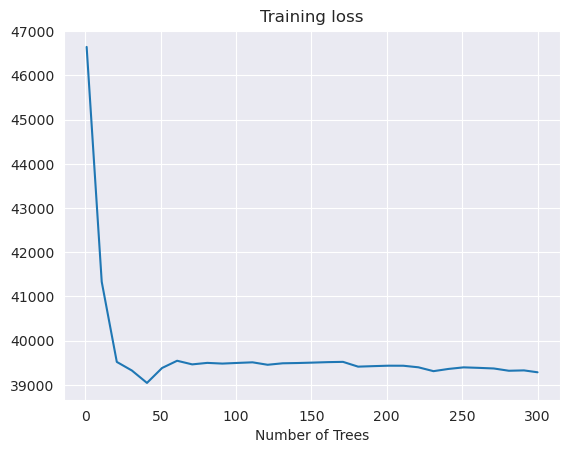

In [55]:
implement_tensorflow_rf(train_ds, test_ds)

Resolve hyper-parameter template "benchmark_rank1" to "benchmark_rank1@v1" -> {'growing_strategy': 'BEST_FIRST_GLOBAL', 'categorical_algorithm': 'RANDOM', 'split_axis': 'SPARSE_OBLIQUE', 'sparse_oblique_normalization': 'MIN_MAX', 'sparse_oblique_num_projections_exponent': 1.0}.
Use /tmp/tmpdjs1q0wg as temporary training directory
Reading training dataset...


[WARNING 24-06-28 19:56:07.9074 EAT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-06-28 19:56:07.9074 EAT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-06-28 19:56:07.9074 EAT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:00.287266. Found 1168 examples.
Training model...
Model trained in 0:00:00.502197
Compiling model...


[INFO 24-06-28 19:56:08.7216 EAT kernel.cc:1233] Loading model from path /tmp/tmpdjs1q0wg/model/ with prefix 831aea9d50e14c28
[INFO 24-06-28 19:56:08.7391 EAT decision_forest.cc:734] Model loaded with 110 root(s), 3880 node(s), and 2 input feature(s).
[INFO 24-06-28 19:56:08.7392 EAT kernel.cc:1061] Use fast generic engine


Model compiled.
Training Loss:  48534.578125
1/1 [==============================] - 1s 692ms/step - loss: 38915.7930 - mae: 27476.5840


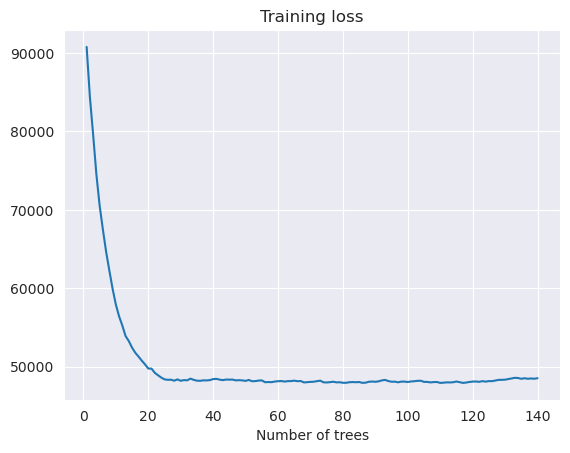

In [56]:
implement_tensorflow_gbt(train_ds, test_ds)

XGBoost and Sklearn had the best scores.

<h3>Round 3</h3>

Add another feature. The most negatively correlated feature

In [57]:
X = train[['OverallQual', 'GrLivArea', 'ExterQual']]

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

XGBoost

In [59]:
dtrain_reg = xgb.DMatrix(X_train, y_train)
dtest_reg = xgb.DMatrix(X_test, y_test)

[0]	Training-rmse:61532.85717	Validation-rmse:59440.02419


[5]	Training-rmse:30136.99236	Validation-rmse:36377.34272
[6]	Training-rmse:28459.15128	Validation-rmse:36222.70529


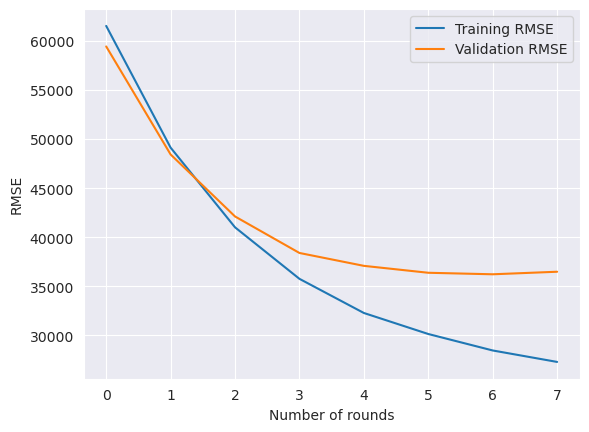

In [60]:
params = {'objective': 'reg:squarederror', 'tree_method': 'hist', 'eval_metric': 'rmse'}
evals = [(dtrain_reg, 'Training'), (dtest_reg, 'Validation')]
n = 100
stop_round = 1
verbose_eval = 5

implement_xgboost(dtrain_reg, params, evals, n, stop_round, verbose_eval)

Better score

Sklearn

In [61]:
implement_sklearn_rf(X_train, y_train, X_test, y_test, n_estimators=50, max_depth=5)

Training Root Mean Squared Error:  30791.303478787908
Test Root Mean Squared Error:  38067.74282648469


Training Mean Absolute Error:  22274.466947837234
Test Mean Absolute Error:  26099.51969745717


Training R2 Score:  0.8517258623359383
Test R2 Score:  0.7565708156636083


Tensorflow

In [62]:
train_ds = X_train.join(y_train)
test_ds = X_test.join(y_test)

Resolve hyper-parameter template "benchmark_rank1" to "benchmark_rank1@v1" -> {'winner_take_all': True, 'categorical_algorithm': 'RANDOM', 'split_axis': 'SPARSE_OBLIQUE', 'sparse_oblique_normalization': 'MIN_MAX', 'sparse_oblique_num_projections_exponent': 1.0}.
Use /tmp/tmptdd7sbih as temporary training directory


Reading training dataset...
Training dataset read in 0:00:00.322952. Found 1168 examples.
Training model...


[INFO 24-06-28 19:56:13.1024 EAT kernel.cc:1233] Loading model from path /tmp/tmptdd7sbih/model/ with prefix 47957b9a5f364ab9


Model trained in 0:00:01.404823
Compiling model...


[INFO 24-06-28 19:56:13.6107 EAT decision_forest.cc:734] Model loaded with 300 root(s), 97236 node(s), and 3 input feature(s).
[INFO 24-06-28 19:56:13.6108 EAT abstract_model.cc:1362] Engine "RandomForestGeneric" built
[INFO 24-06-28 19:56:13.6108 EAT kernel.cc:1061] Use fast generic engine


Model compiled.
Training Loss:  38779.89075016318
1/1 [==============================] - 1s 771ms/step - loss: 39980.2539 - mae: 26418.5625


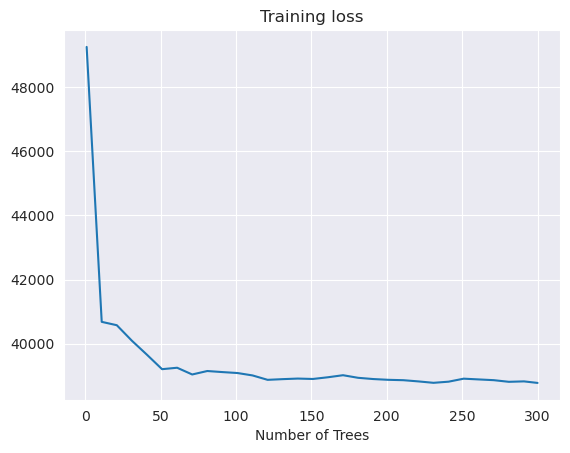

In [63]:
implement_tensorflow_rf(train_ds, test_ds)

Resolve hyper-parameter template "benchmark_rank1" to "benchmark_rank1@v1" -> {'growing_strategy': 'BEST_FIRST_GLOBAL', 'categorical_algorithm': 'RANDOM', 'split_axis': 'SPARSE_OBLIQUE', 'sparse_oblique_normalization': 'MIN_MAX', 'sparse_oblique_num_projections_exponent': 1.0}.
Use /tmp/tmp3lafrvsz as temporary training directory
Reading training dataset...


[WARNING 24-06-28 19:56:15.8857 EAT gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-06-28 19:56:15.8858 EAT gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-06-28 19:56:15.8858 EAT gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:00.299046. Found 1168 examples.
Training model...
Model trained in 0:00:00.489165
Compiling model...


[INFO 24-06-28 19:56:16.6767 EAT kernel.cc:1233] Loading model from path /tmp/tmp3lafrvsz/model/ with prefix 8f4e3e4d768c4500
[INFO 24-06-28 19:56:16.6890 EAT decision_forest.cc:734] Model loaded with 76 root(s), 2958 node(s), and 3 input feature(s).
[INFO 24-06-28 19:56:16.6890 EAT kernel.cc:1061] Use fast generic engine


Model compiled.
Training Loss:  45361.5
1/1 [==============================] - 1s 732ms/step - loss: 38610.2344 - mae: 26126.1875


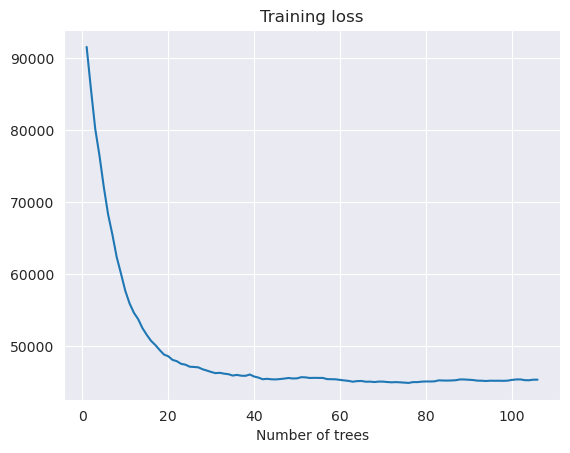

In [64]:
implement_tensorflow_gbt(train_ds, test_ds)

Tensorflow has the poorest performance among the models across all the rounds, so I won't be using it anymore

Fine tuning XGBoost

[0]	Training-rmse:76853.59675	Validation-rmse:74129.01321


[5]	Training-rmse:63723.83730	Validation-rmse:61603.01169
[10]	Training-rmse:53881.75795	Validation-rmse:52476.08776
[15]	Training-rmse:46576.69573	Validation-rmse:45876.52001
[20]	Training-rmse:41234.36100	Validation-rmse:41632.07071
[25]	Training-rmse:37339.28867	Validation-rmse:38931.10320
[30]	Training-rmse:34580.84480	Validation-rmse:37330.82988
[35]	Training-rmse:32570.85363	Validation-rmse:36520.19807
[40]	Training-rmse:31094.79995	Validation-rmse:36125.86902
[44]	Training-rmse:30145.38973	Validation-rmse:36025.25825


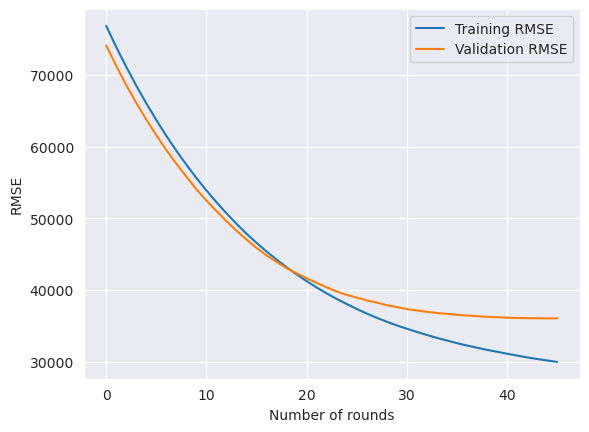

In [65]:
params = {'objective': 'reg:squarederror', 'tree_method': 'hist', 'eval_metric': 'rmse','max_depth':5,
          'eta': 0.05, 'min_child_weight': 0.05, 'gamma': 1, 'reg_alpha': 1, 'reg_lambda': 1}
evals = [(dtrain_reg, 'Training'), (dtest_reg, 'Validation')]
n = 100
stop_round = 1
verbose_eval = 5

implement_xgboost(dtrain_reg, params, evals, n, stop_round, verbose_eval)

XGBoost produced the best scores, be it fine tuned or the more default version

<h3>Round 4</h3>

Use all features

In [66]:
X = train.drop(columns='SalePrice')

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

XGBoost

In [68]:
dtrain_reg = xgb.DMatrix(X_train, y_train)
dtest_reg = xgb.DMatrix(X_test, y_test)

[0]	Training-rmse:60105.85445	Validation-rmse:60744.80918
[30]	Training-rmse:5791.72198	Validation-rmse:30134.63312
[60]	Training-rmse:2702.45632	Validation-rmse:29955.86900
[90]	Training-rmse:1170.34685	Validation-rmse:29826.02532
[120]	Training-rmse:523.77531	Validation-rmse:29803.63411
[149]	Training-rmse:284.83217	Validation-rmse:29783.98168


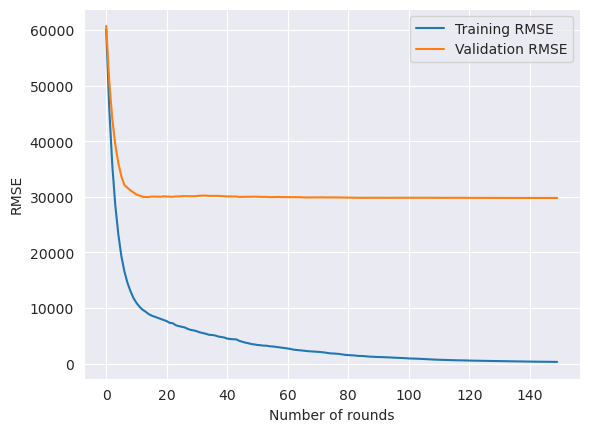

In [69]:
params = {'objective': 'reg:squarederror', 'tree_method': 'hist', 'eval_metric': 'rmse'}
evals = [(dtrain_reg, 'Training'), (dtest_reg, 'Validation')]
n = 150
stop_round = 0
verbose_eval = 30

model = implement_xgboost(dtrain_reg, params, evals, n, stop_round, verbose_eval)

Best performing model so far

Sklearn

In [70]:
implement_sklearn_rf(X_train, y_train, X_test, y_test, n_estimators=50, max_depth=None)

Training Root Mean Squared Error:  11436.359580484163
Test Root Mean Squared Error:  33357.118768942186


Training Mean Absolute Error:  6605.585907534247
Test Mean Absolute Error:  18639.277534246576


Training R2 Score:  0.9795456886442561
Test R2 Score:  0.8130887452113161


<h3>Round 5</h3>

Plot feature importance based off of XGBoost's results

In [71]:
from xgboost import plot_importance

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

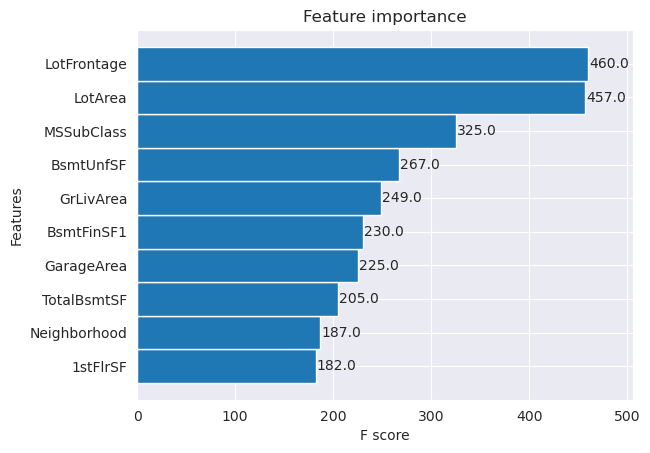

In [72]:
plot_importance(model, max_num_features=10, height=1)

In [73]:
X_relevant = train[['LotArea', 'LotFrontage', 'MSSubClass', 'GrLivArea', 'BsmtUnfSF', 'TotalBsmtSF',
                    'YearBuilt', 'GarageArea', 'Neighborhood', 'BsmtFinSF1']]

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X_relevant, y, test_size=0.2, random_state=101)

In [75]:
dtrain_reg = xgb.DMatrix(X_train, y_train)
dtest_reg = xgb.DMatrix(X_test, y_test)

[0]	Training-rmse:60340.21283	Validation-rmse:61295.49229


[5]	Training-rmse:21106.03347	Validation-rmse:35486.23242
[10]	Training-rmse:13665.85411	Validation-rmse:31779.50167
[15]	Training-rmse:11705.14873	Validation-rmse:31149.02633
[20]	Training-rmse:10509.47851	Validation-rmse:30829.41284
[25]	Training-rmse:9071.85149	Validation-rmse:30792.85976
[30]	Training-rmse:8180.63027	Validation-rmse:30711.19342
[35]	Training-rmse:7218.78343	Validation-rmse:30792.34746
[38]	Training-rmse:6744.08336	Validation-rmse:30814.30513


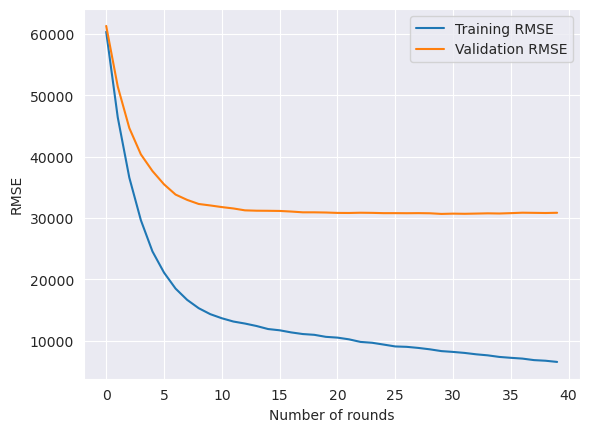

In [76]:
params = {'objective': 'reg:squarederror', 'tree_method': 'hist', 'eval_metric': 'rmse'}
evals = [(dtrain_reg, 'Training'), (dtest_reg, 'Validation')]
n = 100
stop_round = 10
verbose_eval = 5

implement_xgboost(dtrain_reg, params, evals, n, stop_round, verbose_eval)

Simpler model using only 10 features with a fairly good score.

In [77]:
implement_sklearn_rf(X_train, y_train, X_test, y_test, n_estimators=100, max_depth=10)

Training Root Mean Squared Error:  13335.087894209912
Test Root Mean Squared Error:  35110.312897397314


Training Mean Absolute Error:  9212.766057732504
Test Mean Absolute Error:  21423.474617217056


Training R2 Score:  0.9721899977659654
Test R2 Score:  0.7929249427084286


<h3>Round 6<h3>

Reduce dimensionality with PCA

In [78]:
from sklearn.decomposition import PCA

In [79]:
pca = PCA(n_components=10)

In [80]:
X_pca = pca.fit_transform(X)

In [81]:
X_pca.shape

(1460, 10)

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=101)

In [83]:
dtrain_reg = xgb.DMatrix(X_train, y_train)
dtest_reg = xgb.DMatrix(X_test, y_test)

[0]	Training-rmse:61140.82990	Validation-rmse:62948.89095


[5]	Training-rmse:25227.55603	Validation-rmse:44333.87704
[10]	Training-rmse:17682.29588	Validation-rmse:42697.25046
[15]	Training-rmse:14675.78320	Validation-rmse:42666.55797
[20]	Training-rmse:12698.19378	Validation-rmse:42742.66860
[23]	Training-rmse:11856.14675	Validation-rmse:42609.89330


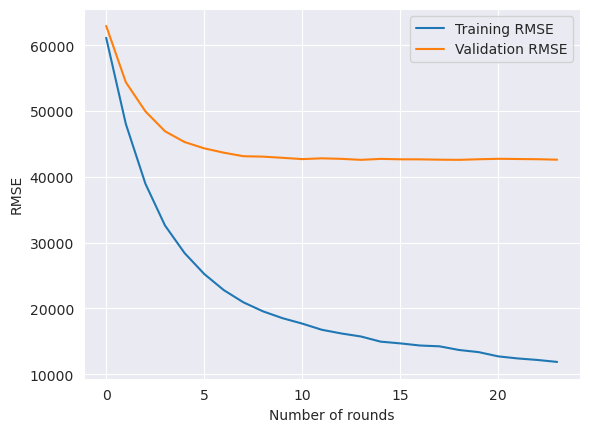

In [84]:
params = {'objective': 'reg:squarederror', 'tree_method': 'hist', 'eval_metric': 'rmse'}
evals = [(dtrain_reg, 'Training'), (dtest_reg, 'Validation')]
n = 100
stop_round = 5
verbose_eval = 5

implement_xgboost(dtrain_reg, params, evals, n, stop_round, verbose_eval)

Simpler model but worse scores than the ones in round 5

<h2>Feature Engineering<h2>

Analysis on the SalePrice column

Normal ditribution Mean: 1.8092e+05, Skew: 1.8829 and Std Deviation: 7.9415e+04


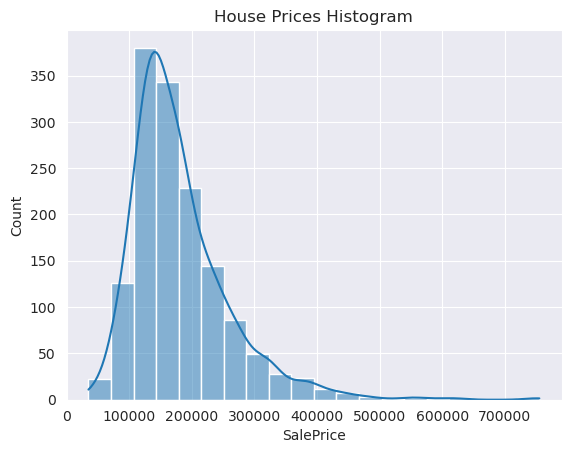

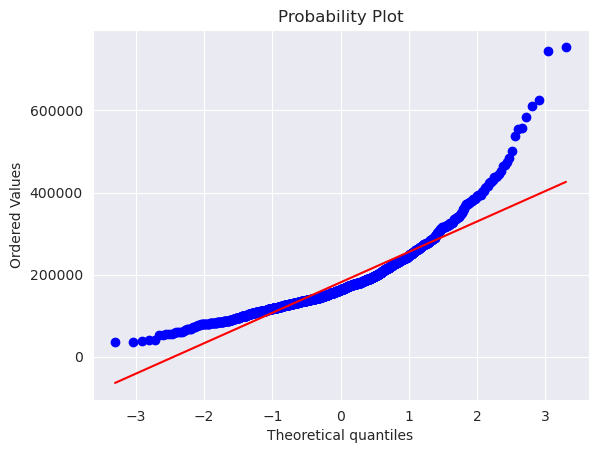

In [85]:
sns.histplot(train['SalePrice'], bins=20, kde=True)

(mu, sigma) = norm.fit(train['SalePrice'])
print(f'Normal ditribution Mean: {mu:.5}, Skew: {train.SalePrice.skew():.5} and Std Deviation: {sigma:.5}')

plt.title('House Prices Histogram')

# QQ-Plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

It is evident that it is right skewed(positive skew)

Transform it with log(1+x) function

In [86]:
y = np.log1p(train.SalePrice)

Normal ditribution Mean: 12.024, Skew: 0.12135, Std Deviation: 0.39931


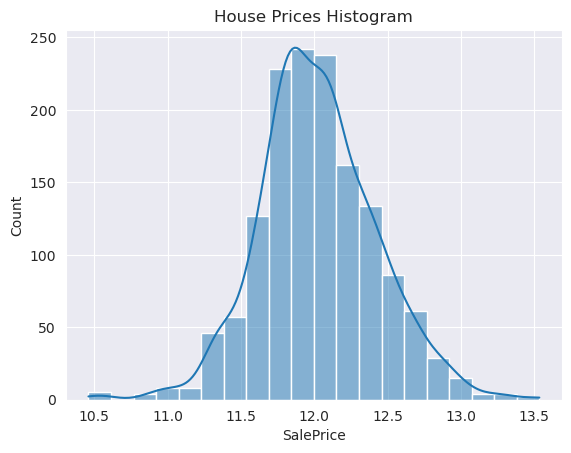

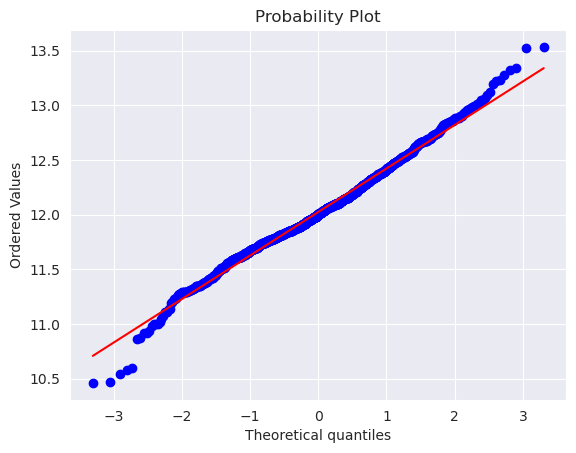

In [87]:
sns.histplot(y, bins=20, kde=True)

(mu, sigma) = norm.fit(y)
print(f'Normal ditribution Mean: {mu:.5}, Skew: {y.skew():.5}, Std Deviation: {sigma:.5}')

plt.title('House Prices Histogram')

# QQ-Plot
fig = plt.figure()
res = stats.probplot(y, plot=plt)
plt.show()

The distribution now looks more normal with a relatively good skew

Use XGBoost Scikit-Learn API

In [88]:
from xgboost import XGBRegressor

In [89]:
def implement_xgb_regressor(X_train, y_train, X_test, y_test, n_estimators, stop_rounds):
    model = XGBRegressor(objective='reg:squarederror', n_estimators=n_estimators, eval_metric='rmse', 
                         tree_method='hist')
    model.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=stop_rounds, verbose=5)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    print('\n')
    print('Training Root Mean Squared Error: ', sqrt(mean_squared_error(y_true=y_train, y_pred=y_pred_train)))
    print('Test Root Mean Squared Error: ', sqrt(mean_squared_error(y_true=y_test, y_pred=y_pred_test)))
    print('\n')
    print('Training Mean Absolute Error: ', mean_absolute_error(y_true=y_train, y_pred=y_pred_train))
    print('Test Mean Absolute Error: ', mean_absolute_error(y_true=y_test, y_pred=y_pred_test))
    print('\n')
    print('Training R2 Score: ', r2_score(y_true=y_train, y_pred=y_pred_train))
    print('Test R2 Score: ', r2_score(y_true=y_test, y_pred=y_pred_test))
    
    return model

In [90]:
X = train.drop('SalePrice', axis=1)

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [92]:
implement_xgb_regressor(X_train, y_train, X_test, y_test, 100, 1)

[0]	validation_0-rmse:0.33528
[5]	validation_0-rmse:0.19325
[10]	validation_0-rmse:0.17113
[15]	validation_0-rmse:0.16450


Training Root Mean Squared Error:  0.049237297701881545
Test Root Mean Squared Error:  0.16442565564913655


Training Mean Absolute Error:  0.03607477450527026
Test Mean Absolute Error:  0.1049183237856911


Training R2 Score:  0.9843695368944746
Test R2 Score:  0.8469166513860232


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Sklearn

In [93]:
implement_sklearn_rf(X_train, y_train, X_test, y_test, 100, 10)

Training Root Mean Squared Error:  0.06031197639493901
Test Root Mean Squared Error:  0.1657762739203734


Training Mean Absolute Error:  0.04357695833863562
Test Mean Absolute Error:  0.10533335194114787


Training R2 Score:  0.9765474242491742
Test R2 Score:  0.8443914209427013


<h2>Feature Interaction</h2>

Total Porch Area

In [94]:
train['TotPorchArea'] = train['OpenPorchSF'] + train['EnclosedPorch'] + train['3SsnPorch'] + train['ScreenPorch']
train['TotPorchArea'].head()

0     61
1      0
2     42
3    307
4     84
Name: TotPorchArea, dtype: int64

Age of House

In [95]:
train['Age'] = train['YrSold'] - train['YearBuilt']
train['Age'].head()


0     5
1    31
2     7
3    91
4     8
Name: Age, dtype: int64

In [96]:
train['TotalBaths'] = train['HalfBath'] + train['FullBath'] + train['BsmtFullBath'] + train['BsmtHalfBath']
train['TotalBaths'].head()

0    4.0
1    3.0
2    4.0
3    2.0
4    4.0
Name: TotalBaths, dtype: float64

Above Ground to Lot Area Ratio

In [97]:
train['GrToLot'] = train['GrLivArea'] / train['LotArea']
train['GrToLot'].head()

0    0.202367
1    0.131458
2    0.158756
3    0.179791
4    0.154137
Name: GrToLot, dtype: float64

In [98]:
train['BsmtRatio'] = train['TotalBsmtSF'] / train['GrLivArea']
train['BsmtRatio'].head()

0    0.500585
1    1.000000
2    0.515118
3    0.440303
4    0.520928
Name: BsmtRatio, dtype: float64

In [99]:
train['TotalSF'] = train['1stFlrSF'] + train['2ndFlrSF'] + train['TotalBsmtSF']
train['TotalSF'].head()

0    2566.0
1    2524.0
2    2706.0
3    2473.0
4    3343.0
Name: TotalSF, dtype: float64

In [100]:
train.columns.shape

(86,)

Implement XGBoost with the added feature

In [101]:
X = train.drop(['SalePrice'], axis=1)

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [103]:
model = implement_xgb_regressor(X_train, y_train, X_test, y_test, 150, 1)

[0]	validation_0-rmse:0.33378
[5]	validation_0-rmse:0.17950
[10]	validation_0-rmse:0.15909
[15]	validation_0-rmse:0.15422
[20]	validation_0-rmse:0.15138


Training Root Mean Squared Error:  0.041667628621695825
Test Root Mean Squared Error:  0.1512991412954892


Training Mean Absolute Error:  0.03026471836931922
Test Mean Absolute Error:  0.1044591037400772


Training R2 Score:  0.9888061109987645
Test R2 Score:  0.8703830746313294


In [104]:
implement_sklearn_rf(X_train, y_train, X_test, y_test, 100, 2)

Training Root Mean Squared Error:  0.20169956118120078
Test Root Mean Squared Error:  0.24098692361446095


Training Mean Absolute Error:  0.15018992695339559
Test Mean Absolute Error:  0.16625877264121106


Training R2 Score:  0.7377029939361901
Test R2 Score:  0.6711667352765847


XGBoost gave out the best score

<h2>Feature Selection</h2>

In [105]:
from sklearn.feature_selection import SelectFromModel
from numpy import sort

In [106]:
thresholds = sort(model.feature_importances_)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

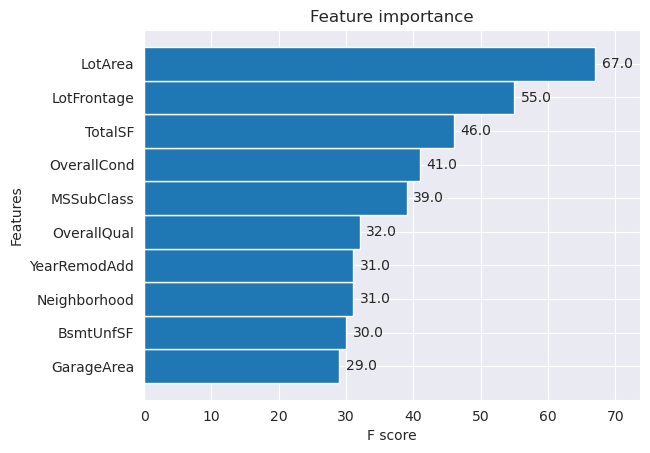

In [107]:
plot_importance(model, max_num_features=10, height=1)

In [108]:
for thresh in thresholds:
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)
    
    selection_model = XGBRegressor(n_estimators=100)
    selection_model.fit(select_X_train, y_train)
    # eval model
    select_X_test = selection.transform(X_test)
    predictions = selection_model.predict(select_X_test)
    r2 = r2_score(y_test, predictions)
    print(f"Thresh: {thresh:.3}, n: {select_X_train.shape[1]}, R2_Score: {r2:.5}")

Thresh: 0.0, n: 85, R2_Score: 0.87291
Thresh: 0.0, n: 85, R2_Score: 0.87291
Thresh: 0.0, n: 85, R2_Score: 0.87291
Thresh: 0.0, n: 85, R2_Score: 0.87291
Thresh: 0.0, n: 85, R2_Score: 0.87291
Thresh: 0.0, n: 85, R2_Score: 0.87291
Thresh: 0.0, n: 85, R2_Score: 0.87291
Thresh: 0.0, n: 85, R2_Score: 0.87291
Thresh: 0.0, n: 85, R2_Score: 0.87291
Thresh: 7.54e-05, n: 76, R2_Score: 0.87389
Thresh: 0.000504, n: 75, R2_Score: 0.87308
Thresh: 0.000547, n: 74, R2_Score: 0.87157
Thresh: 0.000746, n: 73, R2_Score: 0.87082
Thresh: 0.00081, n: 72, R2_Score: 0.87785
Thresh: 0.000841, n: 71, R2_Score: 0.87747
Thresh: 0.000864, n: 70, R2_Score: 0.88015
Thresh: 0.000877, n: 69, R2_Score: 0.8716
Thresh: 0.000951, n: 68, R2_Score: 0.87617
Thresh: 0.00106, n: 67, R2_Score: 0.87719
Thresh: 0.00113, n: 66, R2_Score: 0.87951
Thresh: 0.00117, n: 65, R2_Score: 0.8789
Thresh: 0.00118, n: 64, R2_Score: 0.87672
Thresh: 0.00122, n: 63, R2_Score: 0.8736
Thresh: 0.00123, n: 62, R2_Score: 0.87325
Thresh: 0.00124, n: 61,

According to the selection results, pick 30 most important features which yield reasonable results

In [109]:
model_scores = model.get_booster().get_score(importance_type='gain')
model_scores['LotArea']

0.07895874977111816

In [110]:
weight_scores = pd.DataFrame(model_scores.values(), index=model_scores.keys(), columns=['Weight_Scores'])
weight_scores

,Weight_Scores
MSSubClass,0.007844
MSZoning,0.100765
LotFrontage,0.017641
LotArea,0.078959
Alley,0.018087
...,...
Age,0.183118
TotalBaths,0.301909
GrToLot,0.024519
BsmtRatio,0.030616


In [111]:
weight_scores.Weight_Scores.sort_values(ascending=False)

OverallQual     4.954242
TotalSF         2.545346
GarageCars      1.078534
GarageType      0.621130
KitchenQual     0.388979
                  ...   
Condition1      0.011617
BsmtFinSF2      0.010698
MSSubClass      0.007844
BsmtFinType2    0.007234
Foundation      0.001082
Name: Weight_Scores, Length: 76, dtype: float64

In [112]:
col_relevant = weight_scores.Weight_Scores.sort_values(ascending=False).head(30).index

In [113]:
col_relevant

Index(['OverallQual', 'TotalSF', 'GarageCars', 'GarageType', 'KitchenQual',
       'TotalBaths', 'CentralAir', 'LandContour', 'BsmtQual', 'Fireplaces',
       'GarageYrBlt', 'Age', 'LotShape', 'KitchenAbvGr', 'FullBath',
       'YearRemodAdd', 'BsmtFinSF1', 'GrLivArea', 'MSZoning', 'OverallCond',
       'YearBuilt', 'BsmtUnfSF', '2ndFlrSF', 'GarageArea', 'LotArea',
       'Functional', 'Neighborhood', 'SaleCondition', 'HouseStyle',
       'BsmtCond'],
      dtype='object')

In [114]:
X_col_relevant = X[col_relevant]

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X_col_relevant, y, test_size=0.2, random_state=101)

In [116]:
model = implement_xgb_regressor(X_train, y_train, X_test, y_test, 150, 5)

[0]	validation_0-rmse:0.33424
[5]	validation_0-rmse:0.17648
[10]	validation_0-rmse:0.15071
[15]	validation_0-rmse:0.14520
[20]	validation_0-rmse:0.14379
[25]	validation_0-rmse:0.14367
[30]	validation_0-rmse:0.14292
[35]	validation_0-rmse:0.14270
[40]	validation_0-rmse:0.14268
[44]	validation_0-rmse:0.14299


Training Root Mean Squared Error:  0.02628224359304369
Test Root Mean Squared Error:  0.14212352390994087


Training Mean Absolute Error:  0.019097713460182252
Test Mean Absolute Error:  0.09167227327426122


Training R2 Score:  0.9955464298333656
Test R2 Score:  0.8856277346100608


<h2>Hyperparameter tuning</h2>

In [117]:
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror', n_estimators=150, booster='gbtree', 
    eta=0.15, max_depth=2, reg_alpha=0.001, gamma=0.000015, subsample=0.4
)
xgb_model.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=0, verbose=10)
y_pred_train = xgb_model.predict(X_train)
y_pred_test = xgb_model.predict(X_test)

print('\n')
print('Training Root Mean Squared Error: ', sqrt(mean_squared_error(y_true=y_train, y_pred=y_pred_train)))
print('Test Root Mean Squared Error: ', sqrt(mean_squared_error(y_true=y_test, y_pred=y_pred_test)))
print('\n')
print('Training Mean Absolute Error: ', mean_absolute_error(y_true=y_train, y_pred=y_pred_train))
print('Test Mean Absolute Error: ', mean_absolute_error(y_true=y_test, y_pred=y_pred_test))
print('\n')
print('Training R2 Score: ', r2_score(y_true=y_train, y_pred=y_pred_train))
print('Test R2 Score: ', r2_score(y_true=y_test, y_pred=y_pred_test))

[0]	validation_0-rmse:0.38699
[10]	validation_0-rmse:0.22677
[20]	validation_0-rmse:0.18498
[30]	validation_0-rmse:0.16689
[40]	validation_0-rmse:0.15395
[50]	validation_0-rmse:0.14561
[60]	validation_0-rmse:0.14038
[70]	validation_0-rmse:0.13627
[80]	validation_0-rmse:0.13529
[90]	validation_0-rmse:0.13393
[100]	validation_0-rmse:0.13075
[110]	validation_0-rmse:0.12853
[120]	validation_0-rmse:0.12783
[130]	validation_0-rmse:0.12681
[140]	validation_0-rmse:0.12563
[149]	validation_0-rmse:0.12453


Training Root Mean Squared Error:  0.09445091843459452
Test Root Mean Squared Error:  0.12453434184655743


Training Mean Absolute Error:  0.06877759368835502
Test Mean Absolute Error:  0.0845826246172976


Training R2 Score:  0.942483056740143
Test R2 Score:  0.9121853350183056


In [118]:
implement_sklearn_rf(X_train, y_train, X_test, y_test, 100, 10)

Training Root Mean Squared Error:  0.05919942141170791
Test Root Mean Squared Error:  0.15715273680627528


Training Mean Absolute Error:  0.04290140524332277
Test Mean Absolute Error:  0.10114811966019051


Training R2 Score:  0.9774046875576472
Test R2 Score:  0.8601595907427486


XGBoost produced even better scores

<h2>Stacking</h2>

I will use four models, LightGBM, CatBoost, XGBoost and Random Forest

Sklearn Hyperparameter Tuning

In [119]:
rf = RandomForestRegressor(n_estimators=100, bootstrap=False, max_depth=15, max_features=12)

In [120]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, max_depth=15, max_features=12)

In [121]:
y_pred_test = rf.predict(X_test)
y_pred_train = rf.predict(X_train)

print('Training Root Mean Squared Error: ', sqrt(mean_squared_error(y_true=y_train, y_pred=y_pred_train)))
print('Test Root Mean Squared Error: ', sqrt(mean_squared_error(y_true=y_test, y_pred=y_pred_test)))
print('\n')
print('Training Mean Absolute Error: ', mean_absolute_error(y_true=y_train, y_pred=y_pred_train))
print('Test Mean Absolute Error: ', mean_absolute_error(y_true=y_test, y_pred=y_pred_test))
print('\n')
print('Training R2 Score: ', r2_score(y_true=y_train, y_pred=y_pred_train))
print('Test R2 Score: ', r2_score(y_true=y_test, y_pred=y_pred_test))

Training Root Mean Squared Error:  0.004500408488347322
Test Root Mean Squared Error:  0.1497907098807033


Training Mean Absolute Error:  0.0025461643591138164
Test Mean Absolute Error:  0.096932673793977


Training R2 Score:  0.9998694168029916
Test R2 Score:  0.8729547164211713


LightGBM

In [122]:
from lightgbm import LGBMRegressor

In [123]:
light = LGBMRegressor(learning_rate=0.05, num_iterations=300, num_leaves=10, max_depth=10, verbosity=-1)

In [124]:
light.fit(X_train, y_train)

LGBMRegressor(learning_rate=0.05, max_depth=10, num_iterations=300,
              num_leaves=10, verbosity=-1)

In [125]:
y_pred_test = light.predict(X_test)
y_pred_train = light.predict(X_train)

print('Training Root Mean Squared Error: ', sqrt(mean_squared_error(y_true=y_train, y_pred=y_pred_train)))
print('Test Root Mean Squared Error: ', sqrt(mean_squared_error(y_true=y_test, y_pred=y_pred_test)))
print('\n')
print('Training Mean Absolute Error: ', mean_absolute_error(y_true=y_train, y_pred=y_pred_train))
print('Test Mean Absolute Error: ', mean_absolute_error(y_true=y_test, y_pred=y_pred_test))
print('\n')
print('Training R2 Score: ', r2_score(y_true=y_train, y_pred=y_pred_train))
print('Test R2 Score: ', r2_score(y_true=y_test, y_pred=y_pred_test))

Training Root Mean Squared Error:  0.0723093823665841
Test Root Mean Squared Error:  0.14232562805021395


Training Mean Absolute Error:  0.0497707046227184
Test Mean Absolute Error:  0.08559554329868681


Training R2 Score:  0.9662889149908043
Test R2 Score:  0.8853022213813079


CatBoost

In [126]:
from catboost import CatBoostRegressor

In [127]:
cat = CatBoostRegressor(verbose=0, eta=0.05)

In [128]:
cat.fit(X_train, y_train)

In [129]:
y_pred_test = cat.predict(X_test)
y_pred_train = cat.predict(X_train)

print('Training Root Mean Squared Error: ', sqrt(mean_squared_error(y_true=y_train, y_pred=y_pred_train)))
print('Test Root Mean Squared Error: ', sqrt(mean_squared_error(y_true=y_test, y_pred=y_pred_test)))
print('\n')
print('Training Mean Absolute Error: ', mean_absolute_error(y_true=y_train, y_pred=y_pred_train))
print('Test Mean Absolute Error: ', mean_absolute_error(y_true=y_test, y_pred=y_pred_test))
print('\n')
print('Training R2 Score: ', r2_score(y_true=y_train, y_pred=y_pred_train))
print('Test R2 Score: ', r2_score(y_true=y_test, y_pred=y_pred_test))

Training Root Mean Squared Error:  0.03233327350901732
Test Root Mean Squared Error:  0.13534976410228133


Training Mean Absolute Error:  0.024935824976313668
Test Mean Absolute Error:  0.08313844624581467


Training R2 Score:  0.9932596448721974
Test R2 Score:  0.8962701391264065


Stack all the models

In [130]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import ElasticNetCV, RidgeCV, LassoCV

In [131]:
estimators = [
    ('xgb', xgb_model),
    ('lgb', light),
    ('cat', cat),
]

In [132]:
stack = StackingRegressor(estimators=estimators, final_estimator=LassoCV())

In [133]:
stack.fit(X_train, y_train)

StackingRegressor(estimators=[('xgb',
                               XGBRegressor(base_score=None, booster='gbtree',
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False, eta=0.15,
                                            eval_metric=None,
                                            feature_types=None, gamma=1.5e-05,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=...
                                            max_delta_step=None, max_depth=2,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=150, n_jobs=None,
                                            num_parallel_tree=None, ...)),
                              ('lgb',
                               LGBMRegressor(learning_rate=0.05, max_depth=10,
                                             num_iterations=300, num_leaves=10,
                                             verbosity=-1)),
                              ('cat',
                               <catboost.core.CatBoostRegressor object at 0x7f0fd4c35590>)],
                  final_estimator=LassoCV())

In [134]:
y_pred_test = stack.predict(X_test)
y_pred_train = stack.predict(X_train)

print('Training Root Mean Squared Error: ', sqrt(mean_squared_error(y_true=y_train, y_pred=y_pred_train)))
print('Test Root Mean Squared Error: ', sqrt(mean_squared_error(y_true=y_test, y_pred=y_pred_test)))
print('\n')
print('Training Mean Absolute Error: ', mean_absolute_error(y_true=y_train, y_pred=y_pred_train))
print('Test Mean Absolute Error: ', mean_absolute_error(y_true=y_test, y_pred=y_pred_test))
print('\n')
print('Training R2 Score: ', r2_score(y_true=y_train, y_pred=y_pred_train))
print('Test R2 Score: ', r2_score(y_true=y_test, y_pred=y_pred_test))

Training Root Mean Squared Error:  0.049683722954968826
Test Root Mean Squared Error:  0.1311849417996746


Training Mean Absolute Error:  0.03697094388655414
Test Mean Absolute Error:  0.08055322836120925


Training R2 Score:  0.9840848150627707
Test R2 Score:  0.902555627576063


<h2>Predictions</h2>

In [135]:
ids = test.pop('Id')

In [136]:
ids.head()

0    1461
1    1462
2    1463
3    1464
4    1465
Name: Id, dtype: int64

In [137]:
test['TotalSF'] = test['1stFlrSF'] + test['2ndFlrSF'] + test['TotalBsmtSF']
test['Age'] = test['YrSold'] - test['YearBuilt']
test['TotalBaths'] = test['HalfBath'] + test['FullBath'] + test['BsmtFullBath'] + test['BsmtHalfBath']

In [138]:
test_relevant = test[col_relevant]

In [139]:
test_relevant.isna().sum().sort_values(ascending=False).head()

OverallQual      0
TotalSF          0
HouseStyle       0
SaleCondition    0
Neighborhood     0
dtype: int64

In [140]:
submission = pd.DataFrame()
submission['Id'] = ids
final_preds = stack.predict(test_relevant)
submission['SalePrice'] = np.expm1(final_preds)

In [141]:
submission.head()

,Id,SalePrice
0,1461,129332.158712
1,1462,166804.834117
2,1463,183694.318874
3,1464,192041.540851
4,1465,179060.174280


In [143]:
submission.to_csv('submission_3.csv', index=False)